In [2]:
import pandas as pd

df = pd.read_csv("../ALBRK.csv", index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1.53,1.56,1.50,1.54,1.54,120684723
2020-01-03,1.53,1.59,1.51,1.56,1.56,277348511
2020-01-06,1.53,1.58,1.52,1.54,1.54,151943127
2020-01-07,1.55,1.63,1.54,1.59,1.59,258324552
2020-01-08,1.57,1.64,1.56,1.60,1.60,271860830


In [3]:
#Linear regression
import numpy as np
df['Time'] = np.arange(len(df.index))
df.head()

,Open,High,Low,Close,Adj Close,Volume,Time
Date,,,,,,,
2020-01-02,1.53,1.56,1.50,1.54,1.54,120684723,0
2020-01-03,1.53,1.59,1.51,1.56,1.56,277348511,1
2020-01-06,1.53,1.58,1.52,1.54,1.54,151943127,2
2020-01-07,1.55,1.63,1.54,1.59,1.59,258324552,3
2020-01-08,1.57,1.64,1.56,1.60,1.60,271860830,4


C:\Users\Seyfullah Tıkıç\AppData\Local\Temp\ipykernel_30332\3195100532.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


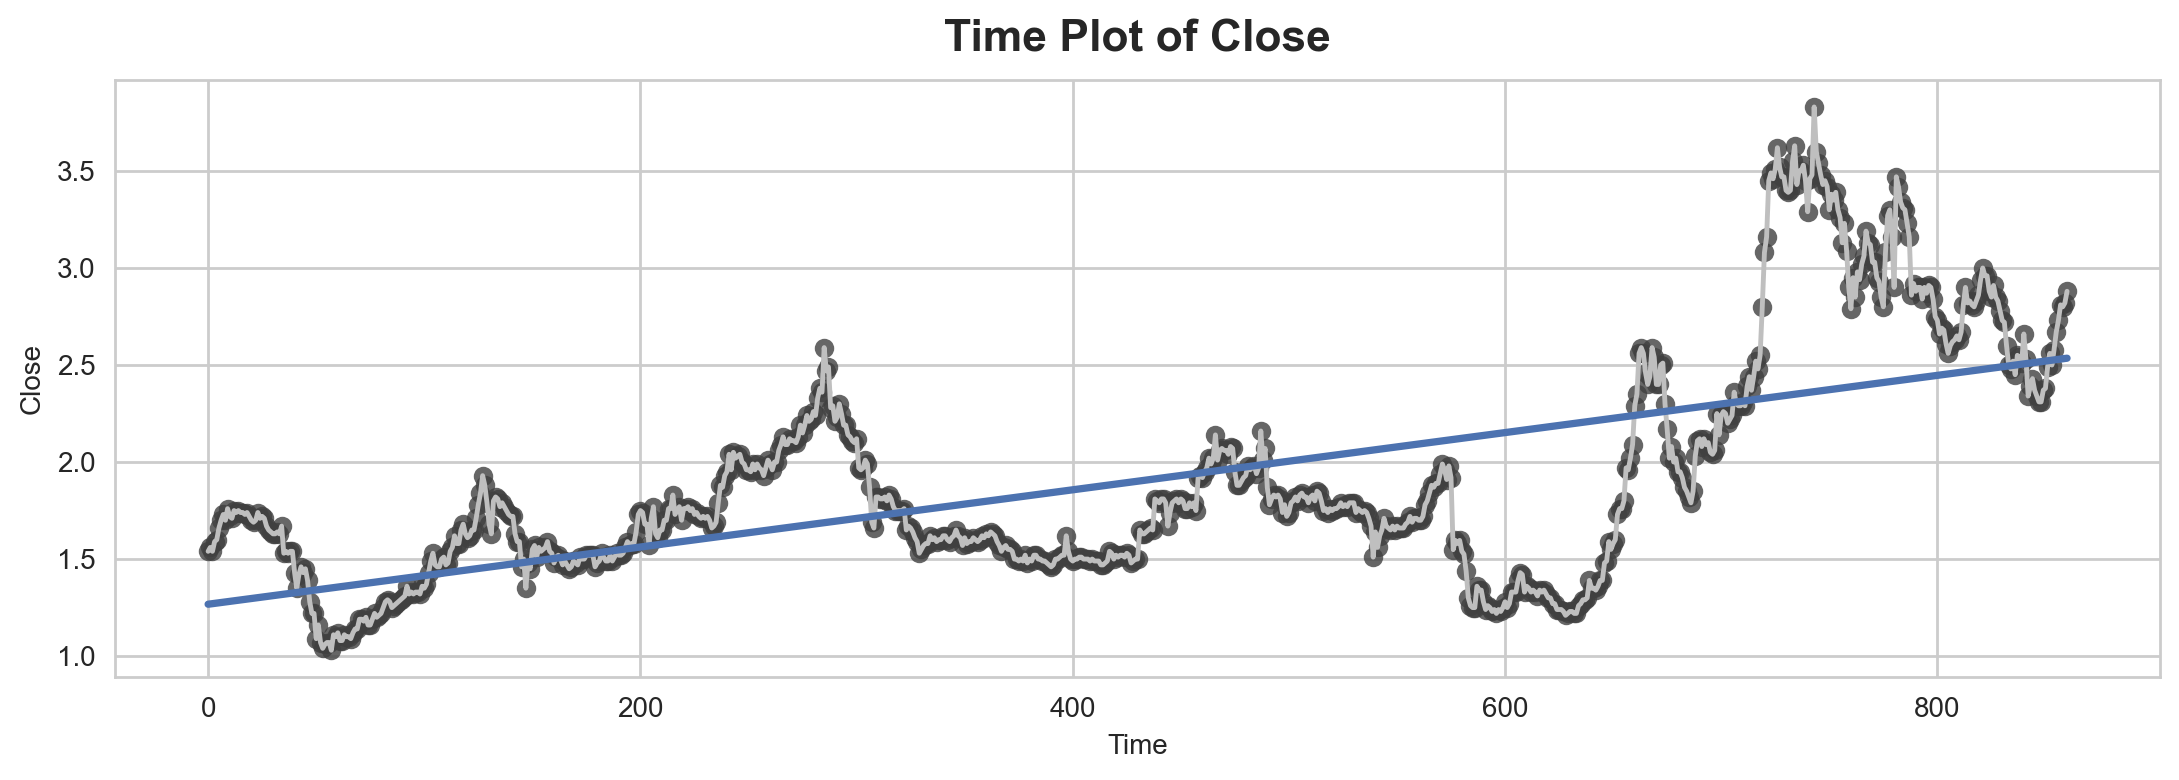

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Close', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Close', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Close');

In [10]:
df['Lag_1'] = df['Close'].shift(1)
df = df.reindex(columns=['Close', 'Lag_1'])

df.head()

,Close,Lag_1
Date,,
2020-01-02,1.54,NaN
2020-01-03,1.56,1.54
2020-01-06,1.54,1.56
2020-01-07,1.59,1.54
2020-01-08,1.60,1.59


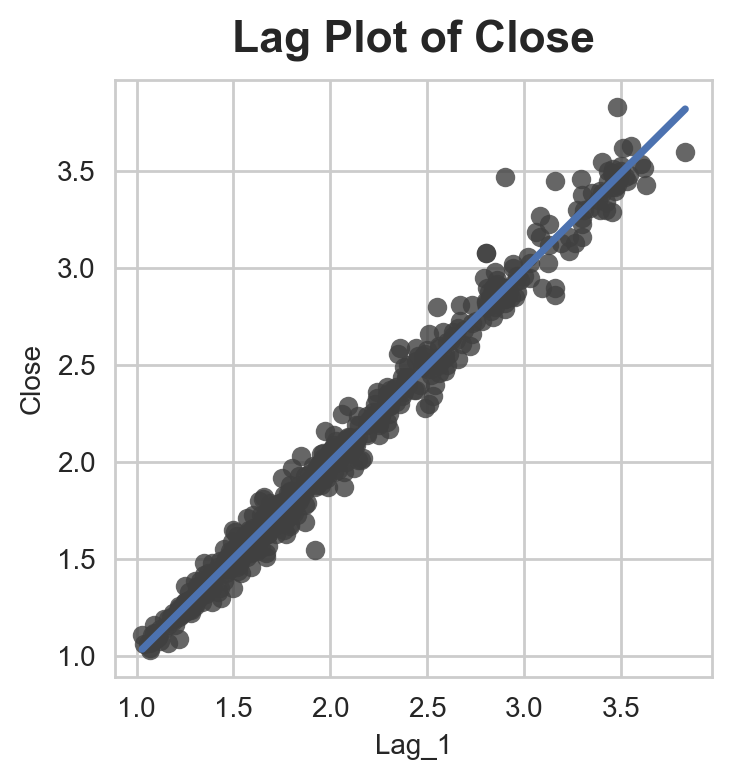

In [11]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Close', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Close');

In [16]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
data_dir = Path("../input/ts-course-data")
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
tunnel = tunnel.set_index("Day")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
tunnel = tunnel.to_period()

tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [17]:
df = tunnel.copy()

df['Time'] = np.arange(len(tunnel.index))

df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [18]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'NumVehicles']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [22]:
X

,Time
Day,
2003-11-01,0
2003-11-02,1
2003-11-03,2
2003-11-04,3
2003-11-05,4
...,...
2005-11-12,742
2005-11-13,743
2005-11-14,744


In [23]:
y

Day
2003-11-01    103536
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
2003-11-05    106569
               ...  
2005-11-12    104646
2005-11-13     94424
2005-11-14    112165
2005-11-15    114296
2005-11-16    114690
Freq: D, Name: NumVehicles, Length: 747, dtype: int64

In [19]:
y_pred

Day
2003-11-01     98176.206344
2003-11-02     98198.703794
2003-11-03     98221.201243
2003-11-04     98243.698693
2003-11-05     98266.196142
                  ...      
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Freq: D, Length: 747, dtype: float64

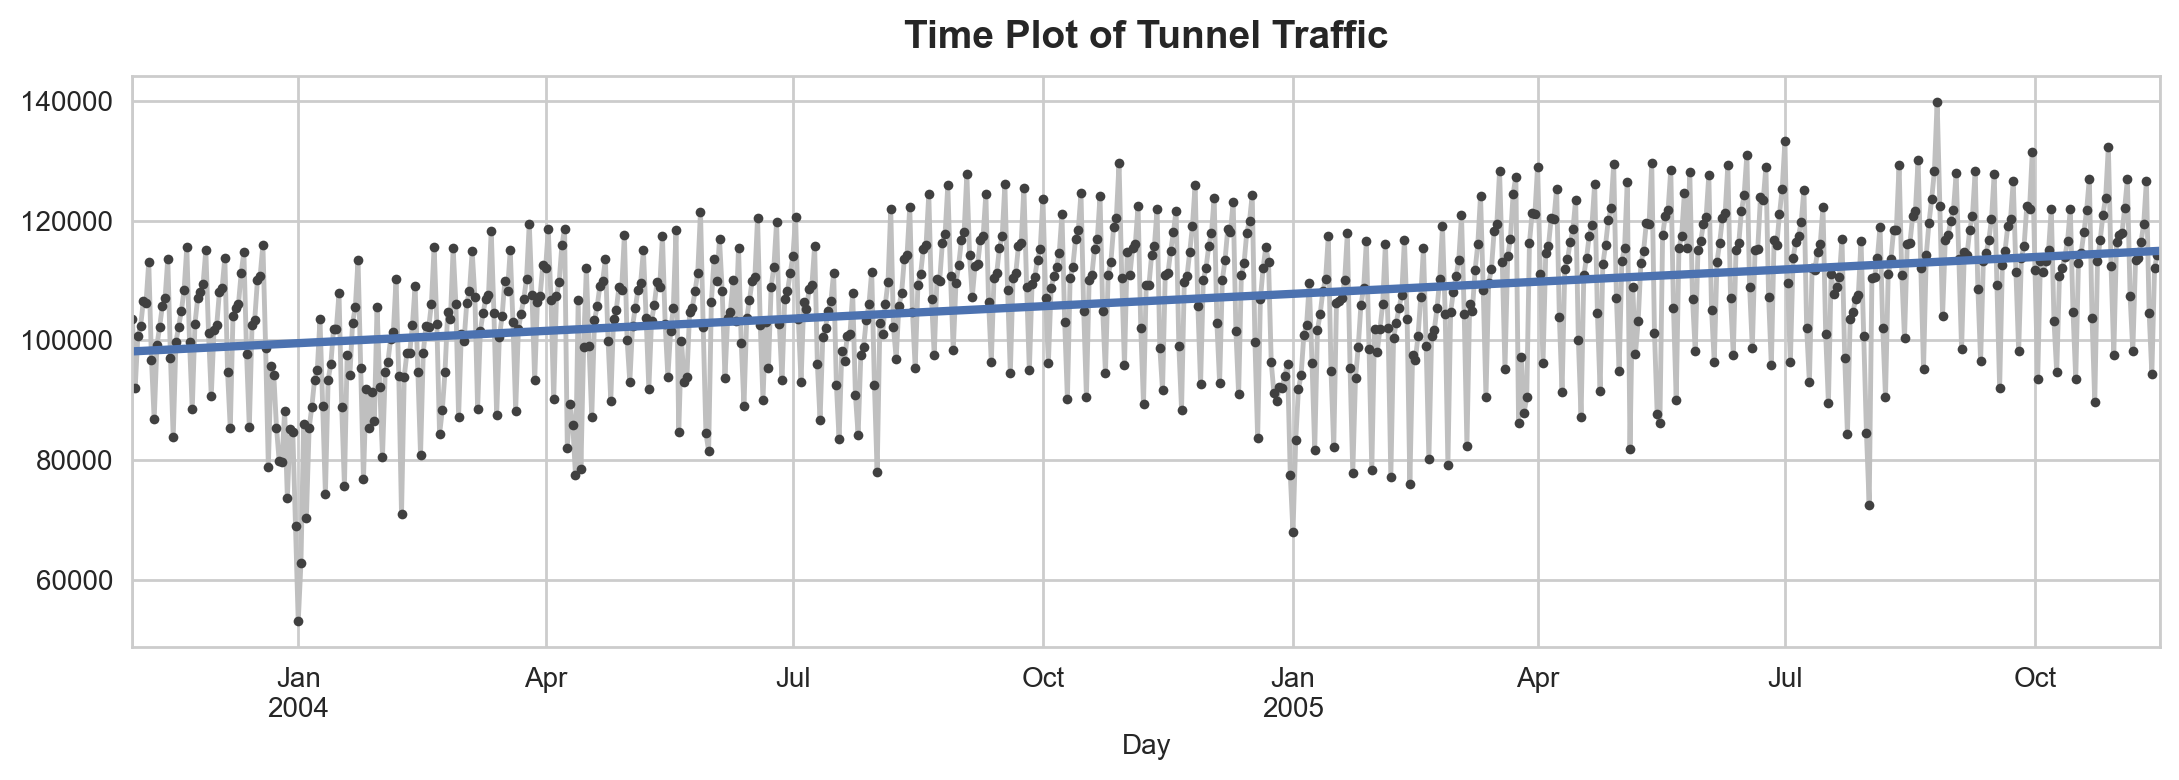

In [20]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

In [24]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [25]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'NumVehicles']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_pred

Day
2003-11-02    104961.799284
2003-11-03     98840.684037
2003-11-04    103500.939302
2003-11-05    104330.767464
2003-11-06    106578.285356
                  ...      
2005-11-12    117280.776890
2005-11-13    105553.391615
2005-11-14    100105.412508
2005-11-15    109560.763451
2005-11-16    110696.514134
Freq: D, Length: 746, dtype: float64

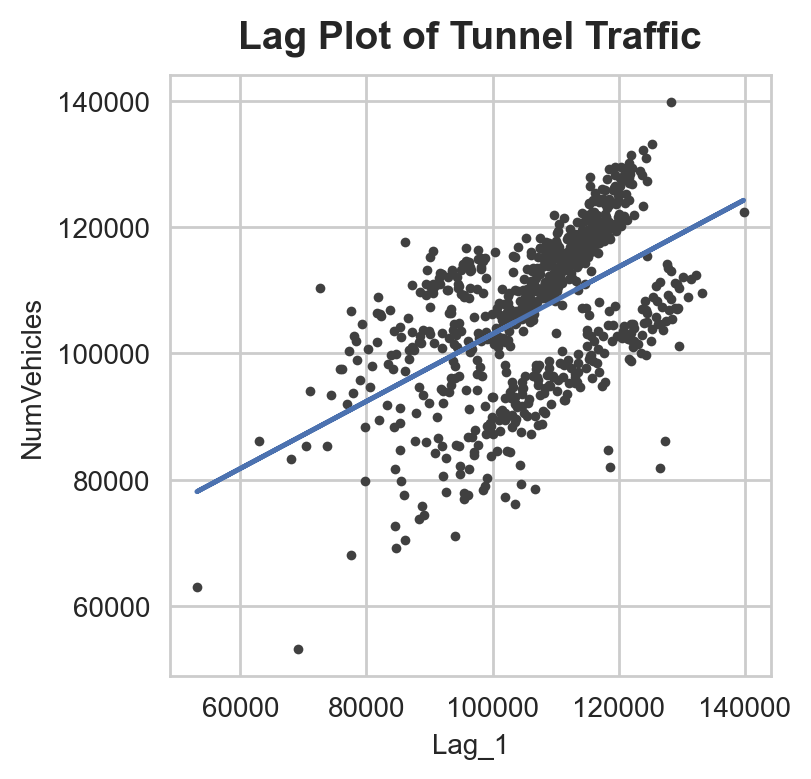

In [26]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

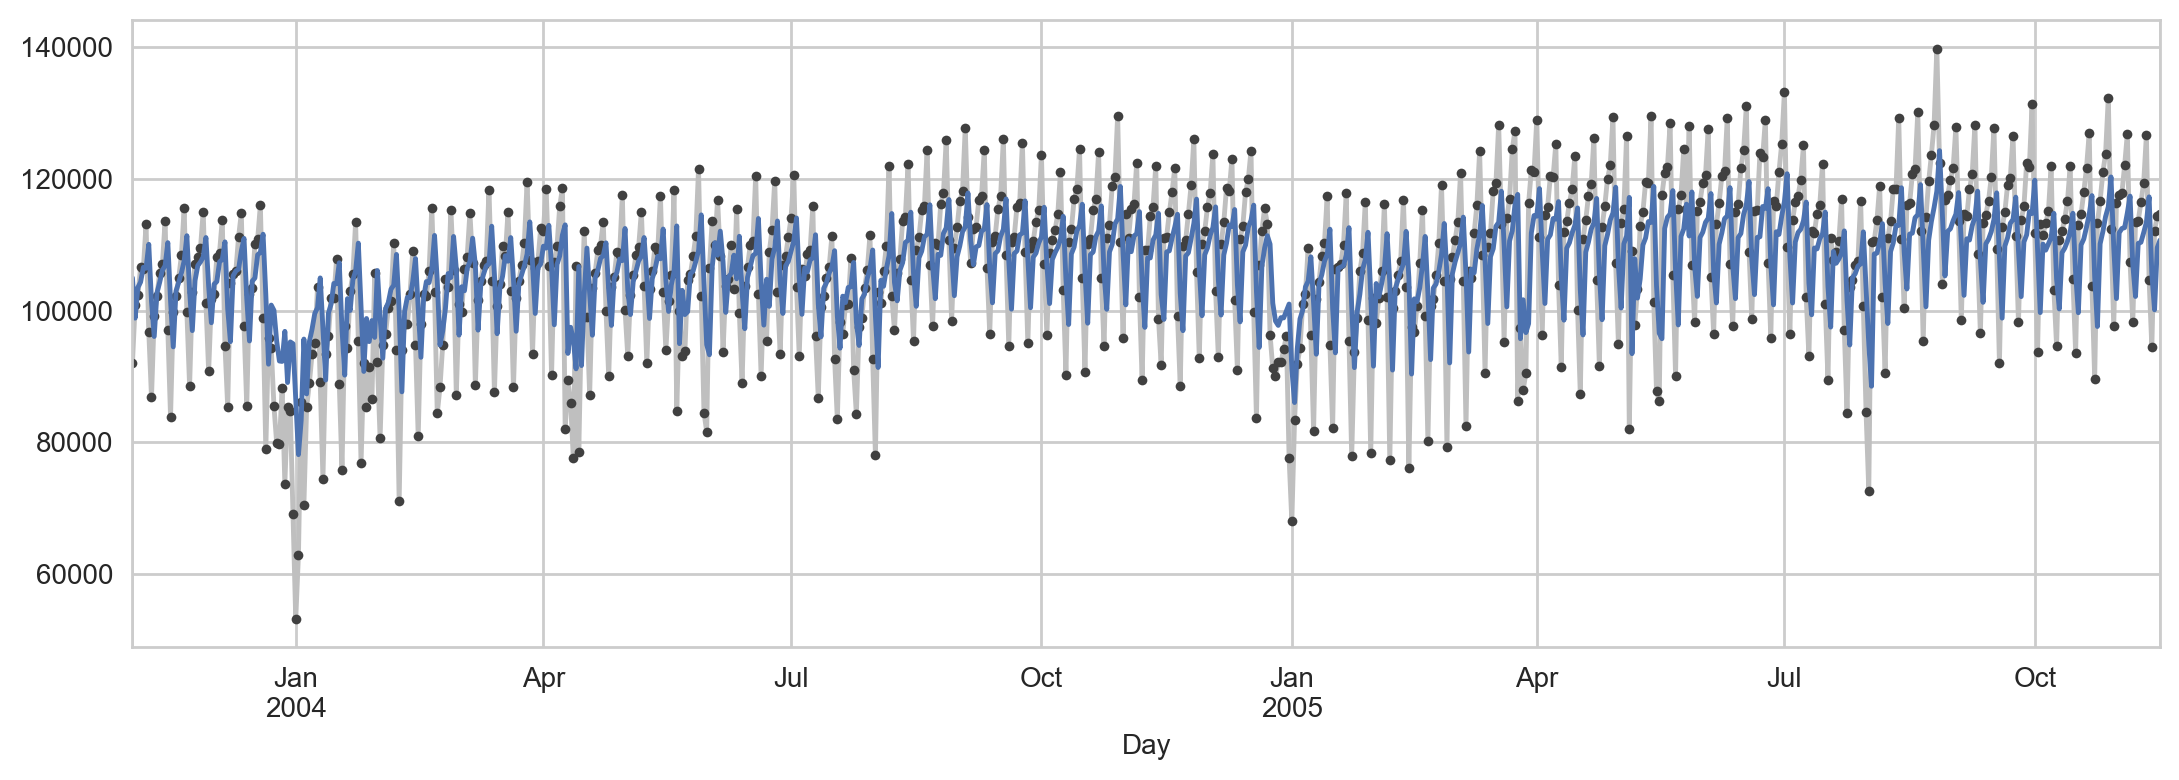

In [27]:
ax = y.plot(**plot_params)
ax = y_pred.plot()